<a href="https://colab.research.google.com/github/sumankmaiti/All-in-one/blob/main/cnn_with_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content/drive/MyDrive/dataset_and_generated_graph/different_resolution

/content/drive/MyDrive/dataset_and_generated_graph/different_resolution


In [ ]:
#KERAS
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,Adam
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import theano
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


In [ ]:
# input image dimensions
img_rows, img_cols = 400, 400

# number of channels
img_channels = 1

In [ ]:
path1 = 'train_data'    #path of folder of images    
path2 = 'resized'  #path of folder to save images   

In [ ]:
listing = os.listdir(path1)
num_samples=size(listing)
print (num_samples)

3717


In [ ]:
im = Image.open(path1 + '/' + listing[0])  
img = im.resize((img_rows, img_cols))
gray = img.convert('L')
            #need to do some more processing here          
gray.save(path2 +'/' +  file, "JPEG")

In [ ]:
for file in listing:
    im = Image.open(path1 + '/' + file)  
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
                #need to do some more processing here          
    gray.save(path2 +'/' +  file, "JPEG")

In [ ]:
imlist = os.listdir(path2)

im1 = array(Image.open('resized' + '/'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images
print (m,n,imnbr)
print (im1)

400 400 3717
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [ ]:
# create matrix to store all flattened images
immatrix = array([array(Image.open('resized'+ '/' + im2))
              for im2 in imlist],'f')

In [ ]:
label=np.ones((num_samples,),dtype = int)
label[0:343]=0
label[343:652]=1
label[652:988]=2
label[988:1637]=3
label[1637:1971]=4
label[1971:2318]=5
label[2318:3008]=6
label[3008:3362]=7
label[3362:]=8

In [ ]:
train_data = []
for i in range(len(imlist)):
  img = array(Image.open('resized' + '/'+ imlist[i])) # open one image to get size
  image.
  # train_data = [image, lebel[i]]
# data,Label = shuffle(immatrix,label, random_state=2)
# train_data = [data,Label]

In [ ]:
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]

(3717, 400, 400)
(3717,)


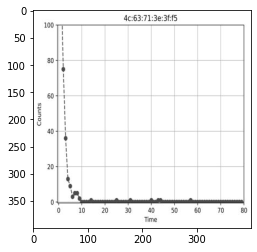

In [ ]:
img=immatrix[0].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')
print (train_data[0].shape)
print (train_data[1].shape)

In [ ]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 9
# number of epochs to train
nb_epoch = 20


# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [ ]:
(X, y) = (train_data[0],train_data[1])

In [ ]:
# STEP 1: split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape

(2973, 400, 400)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train.shape

(2973, 400, 400, 1)

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (2973, 400, 400, 1)
2973 train samples
744 test samples


In [ ]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

i = 100
plt.imshow(X_train[i,0], interpolation='nearest')
print("label : ", Y_train[i,:])

In [ ]:
model = Sequential()

model.add(Convolution2D(32, nb_conv, nb_conv,
                        padding='valid',
                        input_shape=(img_rows, img_cols, 1)))
convout1 = Activation('relu')
model.add(convout1)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Convolution2D(128, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [ ]:
model = Sequential()
model.add(Dense(input= Flatten()))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics =['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=nb_epoch,
              verbose=1)

Epoch 1/20
93/93 [==============================] - 31s 338ms/step - loss: 2.1490 - accuracy: 0.1816
Epoch 2/20
93/93 [==============================] - 31s 333ms/step - loss: 2.1509 - accuracy: 0.1739
Epoch 3/20
93/93 [==============================] - 31s 333ms/step - loss: 2.1512 - accuracy: 0.1810
Epoch 4/20
93/93 [==============================] - 31s 330ms/step - loss: 2.1497 - accuracy: 0.1796
Epoch 5/20
93/93 [==============================] - 31s 329ms/step - loss: 2.1494 - accuracy: 0.1766
Epoch 6/20
93/93 [==============================] - 31s 329ms/step - loss: 2.1502 - accuracy: 0.1783
Epoch 7/20
93/93 [==============================] - 30s 327ms/step - loss: 2.1505 - accuracy: 0.1800
Epoch 8/20
93/93 [==============================] - 31s 329ms/step - loss: 2.1498 - accuracy: 0.1796
Epoch 9/20
93/93 [==============================] - 31s 330ms/step - loss: 2.1481 - accuracy: 0.1806
Epoch 10/20
93/93 [==============================] - 31s 329ms/step - loss: 2.1503 - accura

In [ ]:
    
hist = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
               verbose=1, validation_split=0.2)